<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, GlobalMaxPooling2D, Dropout

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
lables= 10


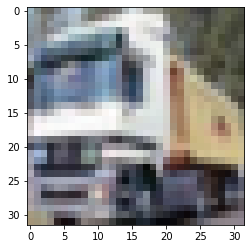

In [13]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
plt.imshow(x_train[1])

y_train, y_test = y_train.flatten(), y_test.flatten()  # Need y to be a vector of (50000,) and not (50000,1)
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

N, H, W, C = x_train.shape
K = len(set(y_train))
print("lables=", K)

In [15]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i) # Conv with strides, default padding = 'valid' 
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5808 - accuracy: 0.4250 - val_loss: 1.3488 - val_accuracy: 0.5090
Epoch 2/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2989 - accuracy: 0.5327 - val_loss: 1.1317 - val_accuracy: 0.5973
Epoch 3/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1741 - accuracy: 0.5786 - val_loss: 1.0545 - val_accuracy: 0.6259
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0850 - accuracy: 0.6124 - val_loss: 0.9796 - val_accuracy: 0.6605
Epoch 5/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0121 - accuracy: 0.6409 - val_loss: 0.9614 - val_accuracy: 0.6680
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9467 - accuracy: 0.6645 - val_loss: 0.9170 - val_accuracy: 0.6798
Epoch 7/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8961 - accuracy: 0.6817 - val_loss: 0.9032 -

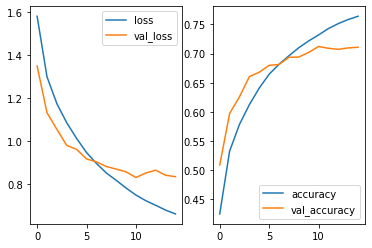

In [17]:
plt.subplot(1,2,1)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

plt.show()

In [18]:
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[824,  18,  24,   8,  16,   2,  10,  15,  55,  28],
       [ 24, 869,   2,   3,   3,   0,   7,   4,  24,  64],
       [ 95,   9, 548,  33, 113,  41, 100,  40,  16,   5],
       [ 35,  11,  79, 396,  84, 176, 107,  62,  26,  24],
       [ 36,   6,  54,  29, 666,  24,  75, 101,   9,   0],
       [ 29,   6,  51, 147,  51, 546,  57,  89,  11,  13],
       [ 13,   7,  22,  24,  42,  16, 848,  13,   9,   6],
       [ 24,   2,  20,  21,  53,  36,   7, 808,   6,  23],
       [ 83,  28,  10,   8,  16,   2,   2,   4, 832,  15],
       [ 48, 100,   3,   3,   5,   7,   9,  19,  35, 771]])

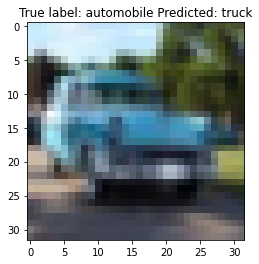

In [22]:
# label mapping
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));